In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### What are the ten most common movie names of all time?

In [6]:
titles.groupby(['title']).count().sort_values('year', ascending=False).head(10)

,year
title,
Hamlet,19
Carmen,15
Macbeth,15
Maya,11
Othello,11
The Outsider,11
The Three Musketeers,11
Hero,11
Honeymoon,10


### Which three years of the 1930s saw the most films released?

In [7]:
titles[(titles.year >= 1930) & (titles.year <= 1940)].groupby('year').count().sort_values('title',ascending = False).head(3)

,title
year,
1937,1190
1936,1133
1938,1127


### Plot the number of films that have been released each decade over the history of cinema.

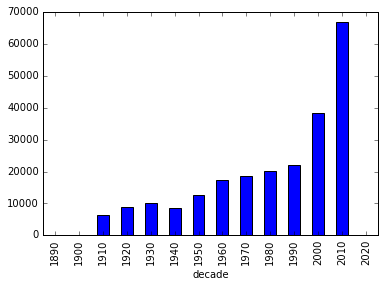

In [8]:
titles['decade'] = titles.year // 10 * 10
titlesPerDec = titles.groupby('decade').size()
titlesPerDec.plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

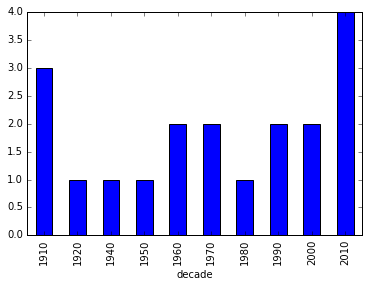

In [9]:
titles[titles.title == 'Hamlet'].groupby('decade').size().plot(kind = 'bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

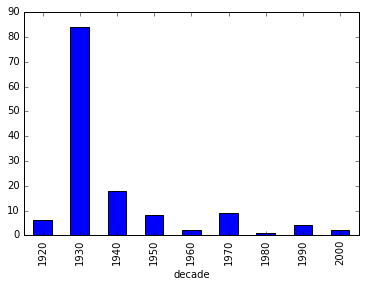

In [10]:
cast['decade'] = cast.year // 10 * 10
cast[cast.character == 'Rustler'].groupby('decade').size().plot(kind = 'bar')

### Plot the number of "Hamlet" characters each decade.

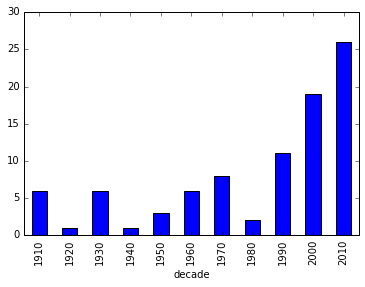

In [11]:
cast[cast.character == 'Hamlet'].groupby('decade').size().plot(kind = 'bar')

### What are the 11 most common character names in movie history?

In [12]:
cast.groupby(cast.character).size().sort_values(ascending = False).head(11)

character
Himself        19362
Dancer         11850
Extra          10690
Reporter        8046
Doctor          7321
Student         6929
Policeman       6801
Party Guest     6644
Nurse           6529
Bartender       6501
Minor Role      6172
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [13]:
cast[cast.character == 'Herself'].groupby('name').size().sort_values(ascending = False).head(10)

name
Joyce Brothers        14
Queen Elizabeth II    11
Mary Jo Pehl           7
Margaret Thatcher      7
Joan Rivers            6
Rekha                  5
Kareena Kapoor         5
Hillary Clinton        5
Caroline Rhea          5
Bunny Yeager           5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [14]:
cast[cast.character == 'Himself'].groupby('name').size().sort_values(ascending = False).head(10)

name
Adolf Hitler             98
Richard Nixon            44
Ronald Reagan            36
John F. Kennedy          29
Ron Jeremy               22
George W. Bush           22
Benito Mussolini         22
Winston Churchill        22
Bill Clinton             20
Franklin D. Roosevelt    20
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [15]:
cast[cast.year == 1945].groupby('name').size().sort_values(ascending = False)

name
Emmett Vogan            39
Sam (II) Harris         32
Bess Flowers            29
Harold Miller           29
Nolan Leary             27
Frank O'Connor          27
Larry Steers            25
Franklyn Farnum         25
Pierre Watkin           24
Herman Hack             24
Tom London              24
Edmund Cobb             24
Charles Sullivan        24
Addison Richards        23
Kenner G. Kemp          23
Horace B. Carpenter     23
Bud Osborne             23
Chester Clute           22
Lee Phelps              22
Byron Foulger           22
Jack Ingram             22
Arthur Loft             22
Budd Buster             22
Rex Lease               21
James Conaty            21
Jack O'Shea             21
Al Ferguson             21
Edward Gargan           21
James Flavin            20
Roy Bucko               20
                        ..
Larry Keating            1
Larry Lathrop            1
Larry Moore              1
Larry Parks              1
Lars Hensen              1
Lars Lennartsson       

### Which actors or actresses appeared in the most movies in the year 1985?

In [16]:
cast[cast.year == 1985].groupby('name').size().sort_values(ascending = False)

name
Mammootty                      21
Shakti Kapoor                  20
Sukumari                       19
Lou Scheimer                   15
Aruna Irani                    15
Raj Babbar                     15
Mohanlal                       15
Rajesh Khanna                  13
Deven Verma                    13
Om Shivpuri                    12
Pinchoo Kapoor                 12
Jagdish Raj                    12
Satyendra Kapoor               12
Asrani                         12
Yunus Parvez                   11
Danny Denzongpa                11
Innocent Vareed Thekkethala    11
Thilakan                       11
Jagathi Sreekumar              10
Rati Agnihotri                 10
Shobana                        10
Iftekhar                       10
Madan Puri                     10
Sharat Saxena                  10
Kulbhushan Kharbanda           10
Pat (II) Fraley                 9
Sudhir                          9
Prem Chopra                     9
Huma Khan                       9
Lalu Alex

### Plot how many roles Mammootty has played in each year of his career.

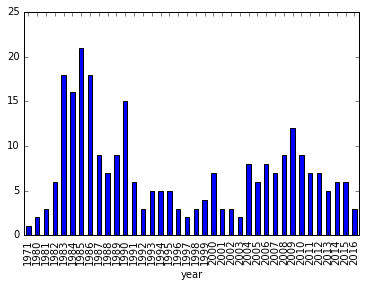

In [17]:
cast[cast.name == 'Mammootty'].groupby('year').size().plot(kind = 'bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [18]:
cast[cast.character.str.startswith('Patron In')].groupby('character').size().sort_values(ascending = False).head(10)

character
Patron In The Bar       1
Patron In Restaurant    1
Patron In Chaps         1
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [19]:
cast[cast.character.str.startswith('Science')].groupby('character').size().sort_values(ascending = False).head(10)

character
Science Teacher         57
Science Fair Student     9
Science Student          9
Science Club Member      5
Science Fair Judge       5
Science Kid              5
Science Promo Cadet      5
Science Reporter         5
Science teacher          3
Science Fair Kid         3
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

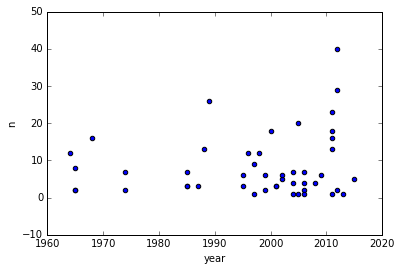

In [20]:
cast[cast.name == 'Judi Dench'].sort_values('year').plot(x='year', y='n', kind='scatter')
#Year as x axis, n as y axis. Scatterplot

### Plot the n-values of Cary Grant's roles through his career.

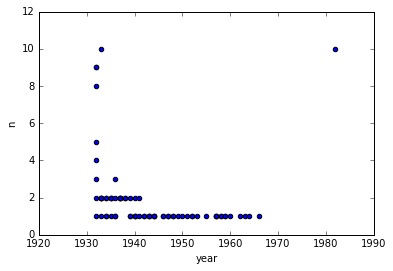

In [21]:
cast[cast.name == 'Cary Grant'].sort_values('year').plot(x='year', y='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

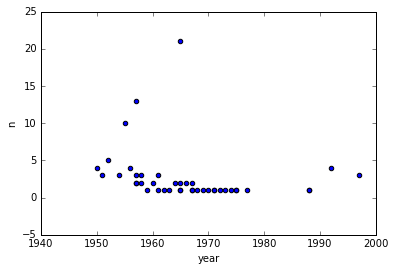

In [22]:
cast[cast.name == 'Sidney Poitier'].sort_values('year').plot(x='year', y='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [23]:
cast[(cast.n==1) & (cast.decade==1950)].groupby('type').size()

type
actor      6563
actress    2940
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [24]:
cast[(cast.n==2) & (cast.decade==1950)].groupby('type').size()

type
actor      4530
actress    4519
dtype: int64